# FIRST GLANCE

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# %matplotlib inline

In [131]:
from sklearn.datasets import load_boston
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [132]:
# load data to dataframa pandas

def load_dataframe(dataset):
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['MEDV'] = dataset.target
    print(df.head())
    return df
    
boston_dataframe = load_dataframe(dataset)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


# CLEANING AND PRE-PROCESSING

In [133]:
#count missing values
def count_missing_values(df):
    missing_val = df.isnull().sum()
    return missing_val
    
print(count_missing_values(boston_dataframe))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# DATA ANALYSIS

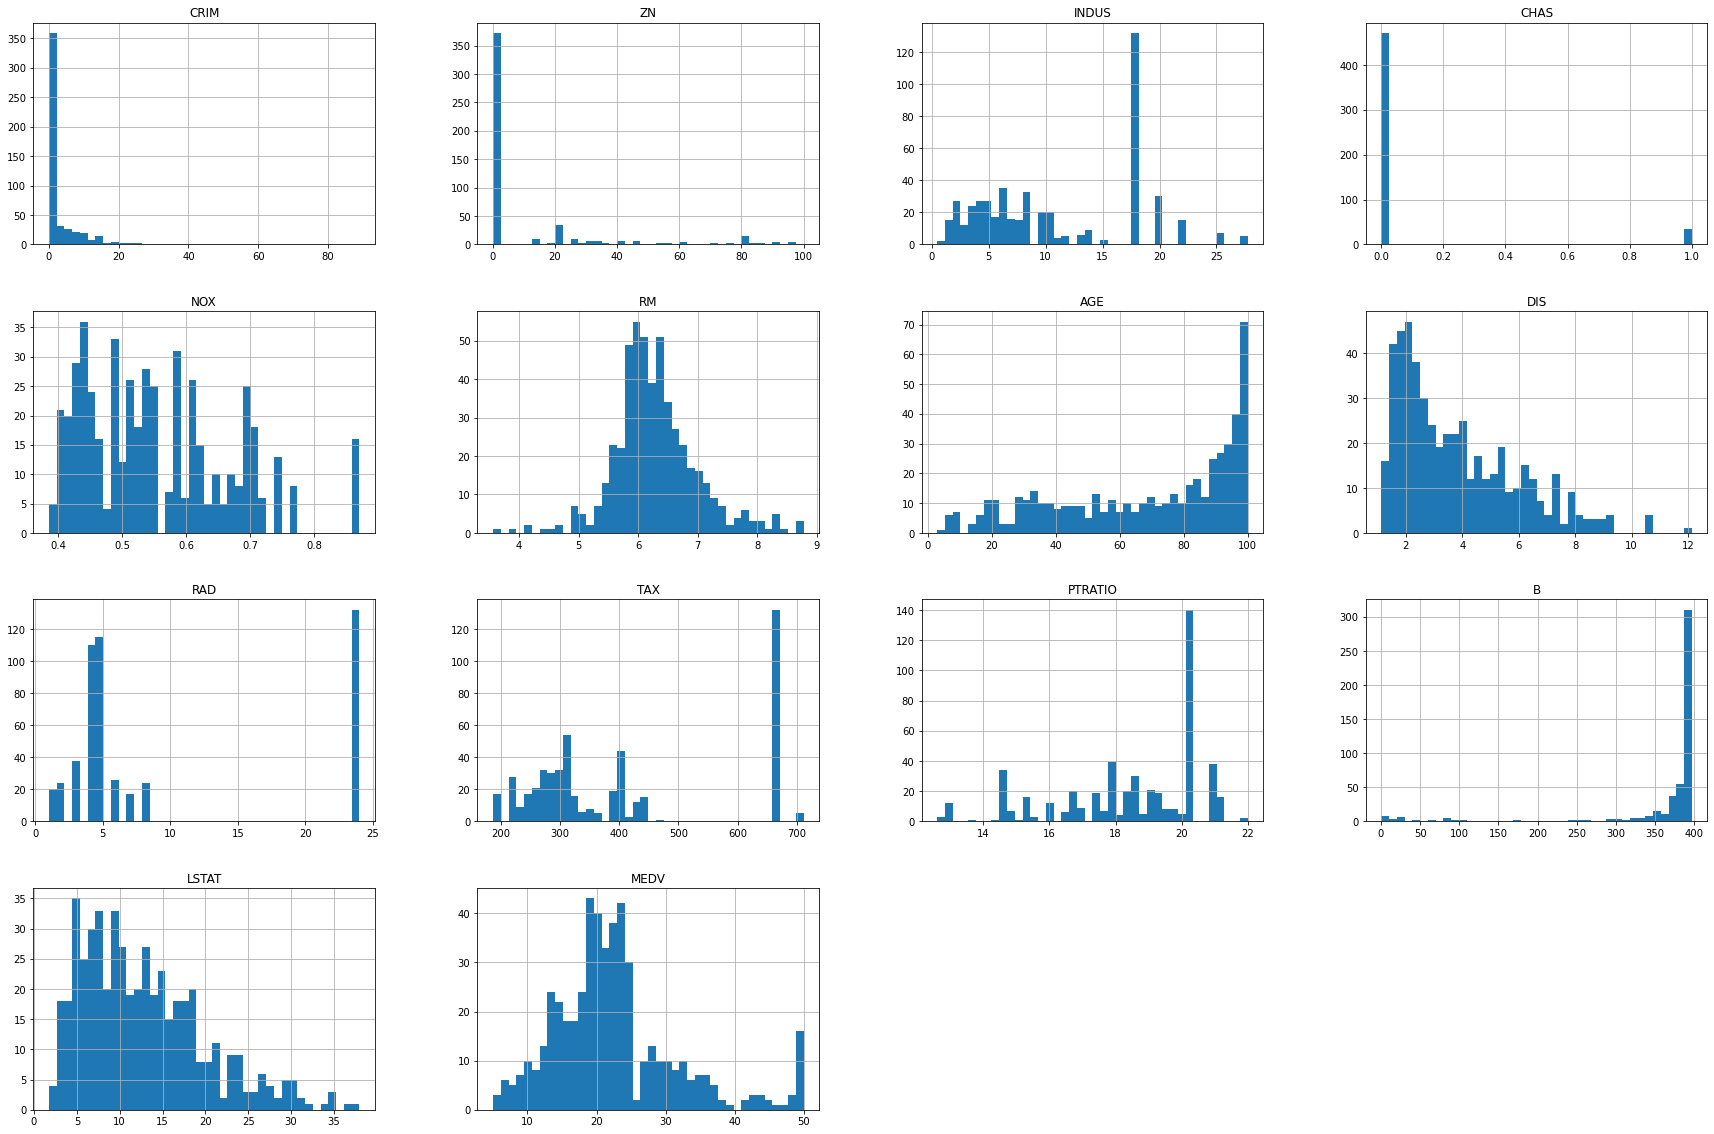

In [134]:
#histograms
num_bins = 40
hist = boston_dataframe.hist(bins=num_bins,figsize=(30,20))

In [135]:
#correlation matrix and correlations for MEDV

def compute_correlations_matrix(df):
    corr_matrix = df.corr()
    return corr_matrix

correlations = compute_correlations_matrix(boston_dataframe)

print(correlations['MEDV'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


In [136]:
#correlation between MEDV AND RM is 0.695360

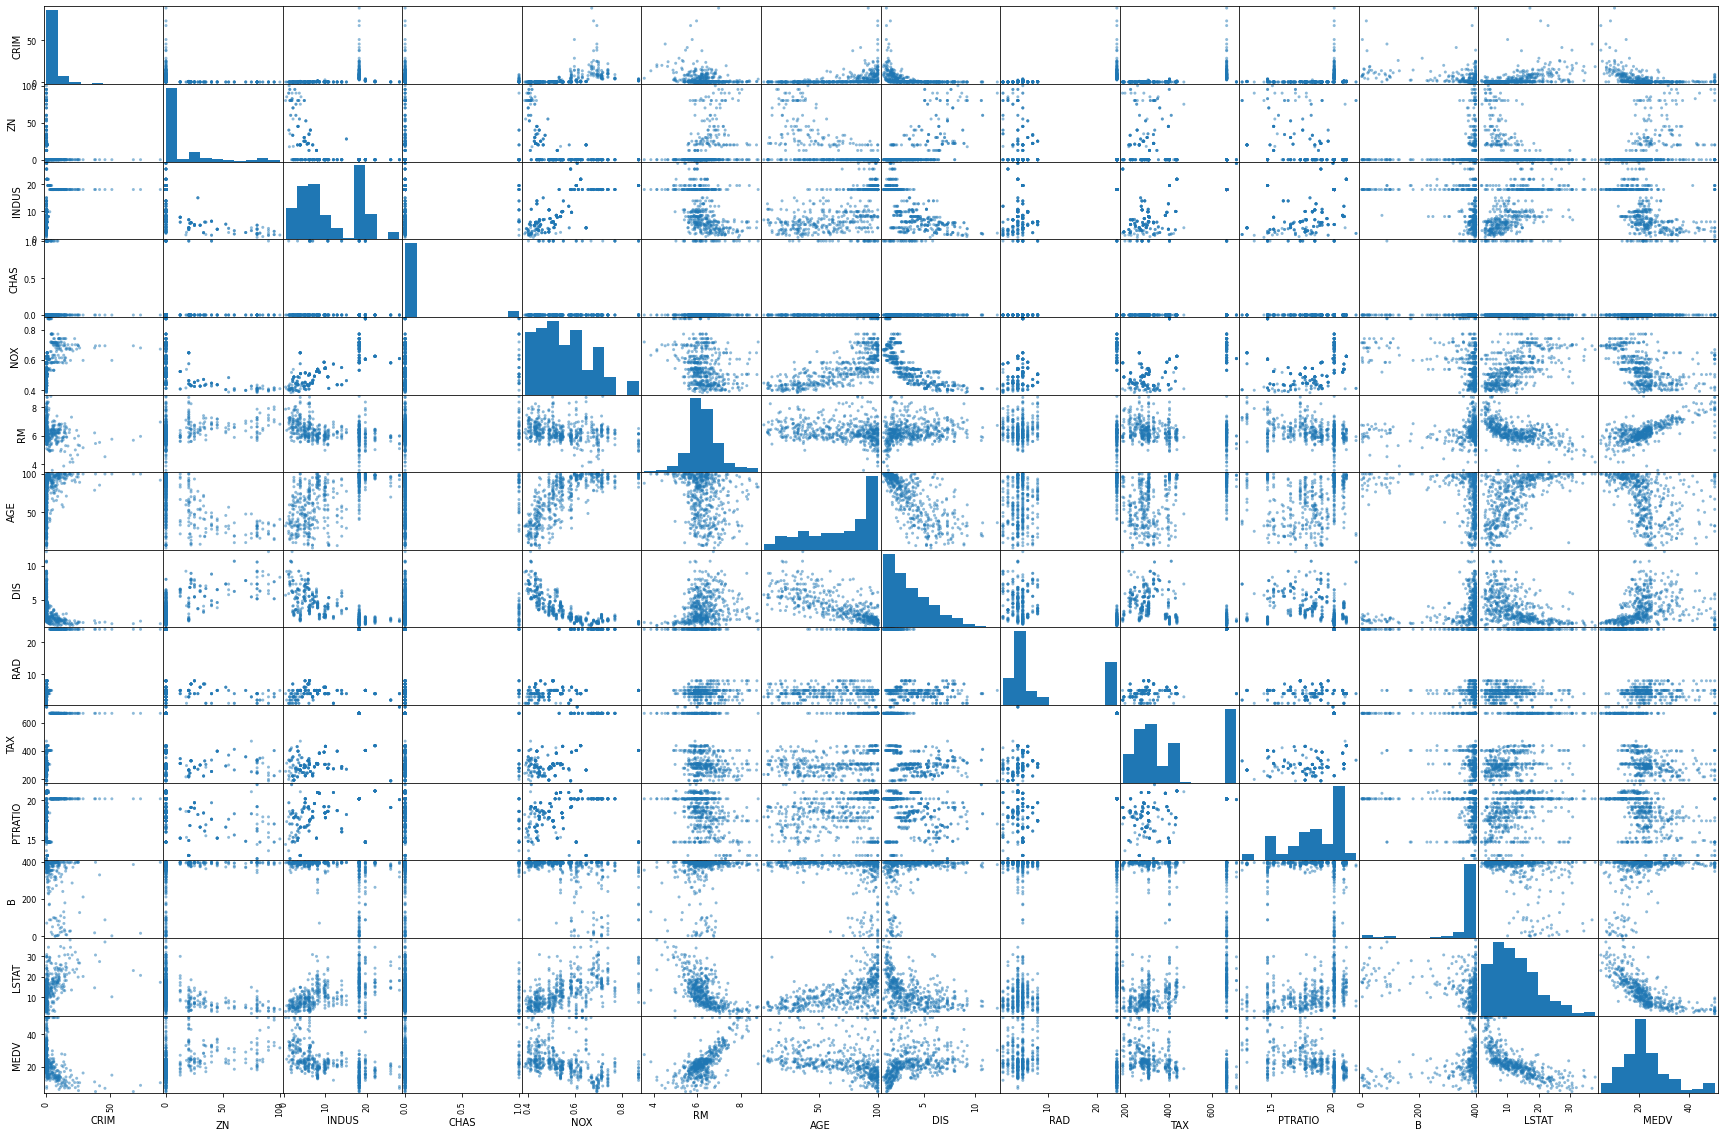

In [137]:
#scatter matrix

pd.plotting.scatter_matrix(boston_dataframe,alpha=0.5,figsize=(30,20))
plt.show()

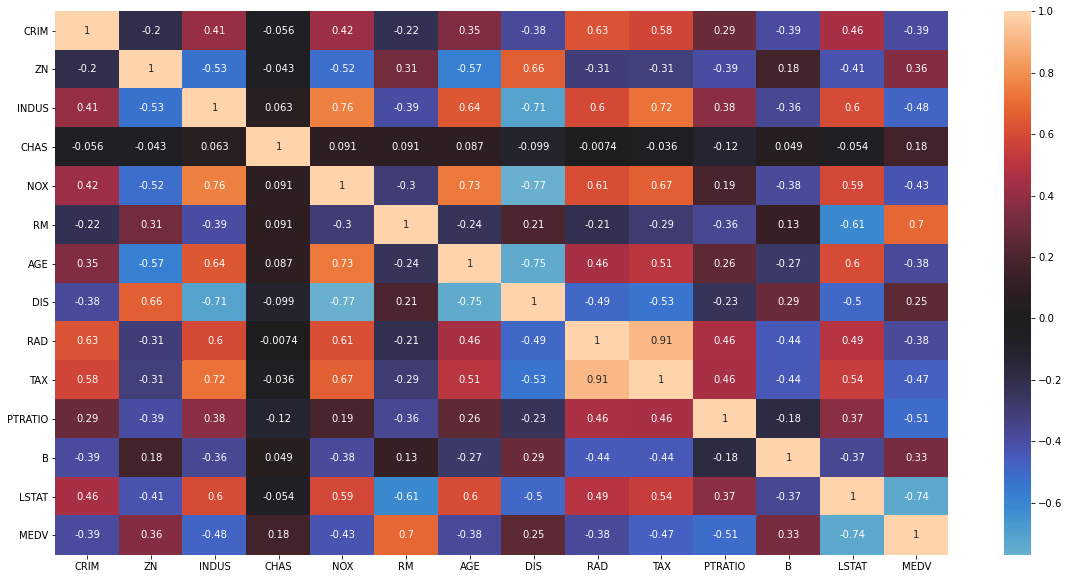

In [138]:
#heatmap

plt.figure(figsize=(20,10))
sns.heatmap(correlations,center = 0,annot=True)
plt.show()

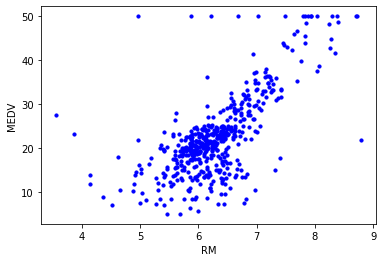

In [139]:
#scatter plot MEDV as function of RM

plt.xlabel("RM")
plt.ylabel('MEDV')
plt.scatter(boston_dataframe['RM'],boston_dataframe['MEDV'],color='b',s=10)
plt.show()

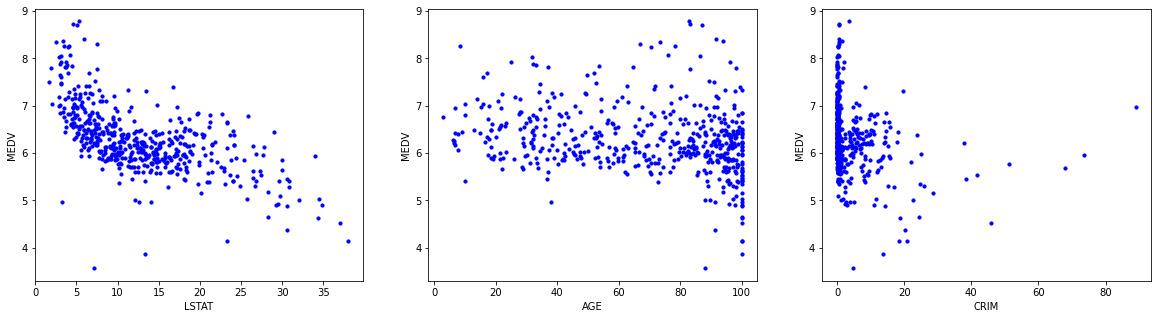

In [140]:
#scatter plot MEDV as function of LSTAT
#scatter plot MEDV as function of AGE
#scatter plot MEDV as function of CRIM

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel("LSTAT")
plt.ylabel('MEDV')
plt.scatter(boston_dataframe['LSTAT'],boston_dataframe['RM'],color='b',s=10)
plt.subplot(132)
plt.xlabel("AGE")
plt.ylabel('MEDV')
plt.scatter(boston_dataframe['AGE'],boston_dataframe['RM'],color='b',s=10)
plt.subplot(133)
plt.xlabel("CRIM")
plt.ylabel('MEDV')
plt.scatter(boston_dataframe['CRIM'],boston_dataframe['RM'],color='b',s=10)
plt.show()

In [141]:
# There is strong linear correlation (scatter_plot), heatmap between MEDV and LSTAT

In [142]:
# Correlations for LSTAT
print(correlations['LSTAT'])

CRIM       0.455621
ZN        -0.412995
INDUS      0.603800
CHAS      -0.053929
NOX        0.590879
RM        -0.613808
AGE        0.602339
DIS       -0.496996
RAD        0.488676
TAX        0.543993
PTRATIO    0.374044
B         -0.366087
LSTAT      1.000000
MEDV      -0.737663
Name: LSTAT, dtype: float64


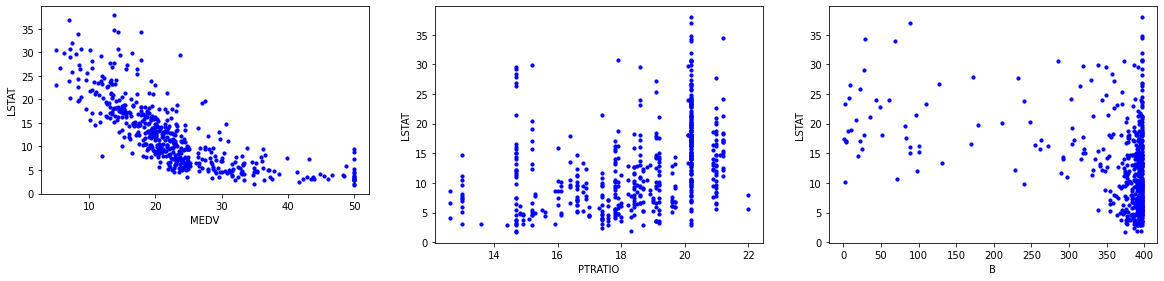

In [143]:
plt.figure(figsize = (20,20))
x_axis_list = [i for i in boston_dataframe.columns if i != 'LSTAT']
y_axis = boston_dataframe['LSTAT']
i = 1
row = 1

for col in (x_axis_list):
    if i == 4: 
        i = 1
        row=row+1
    plt.subplot(row,3,i)
#     print(i)
#     print(row)
    x_axis = boston_dataframe[col]
    plt.scatter(x_axis,y_axis,color='b',s=10)
    plt.xlabel(col)
    plt.ylabel('LSTAT')
    i=i+1
    
    

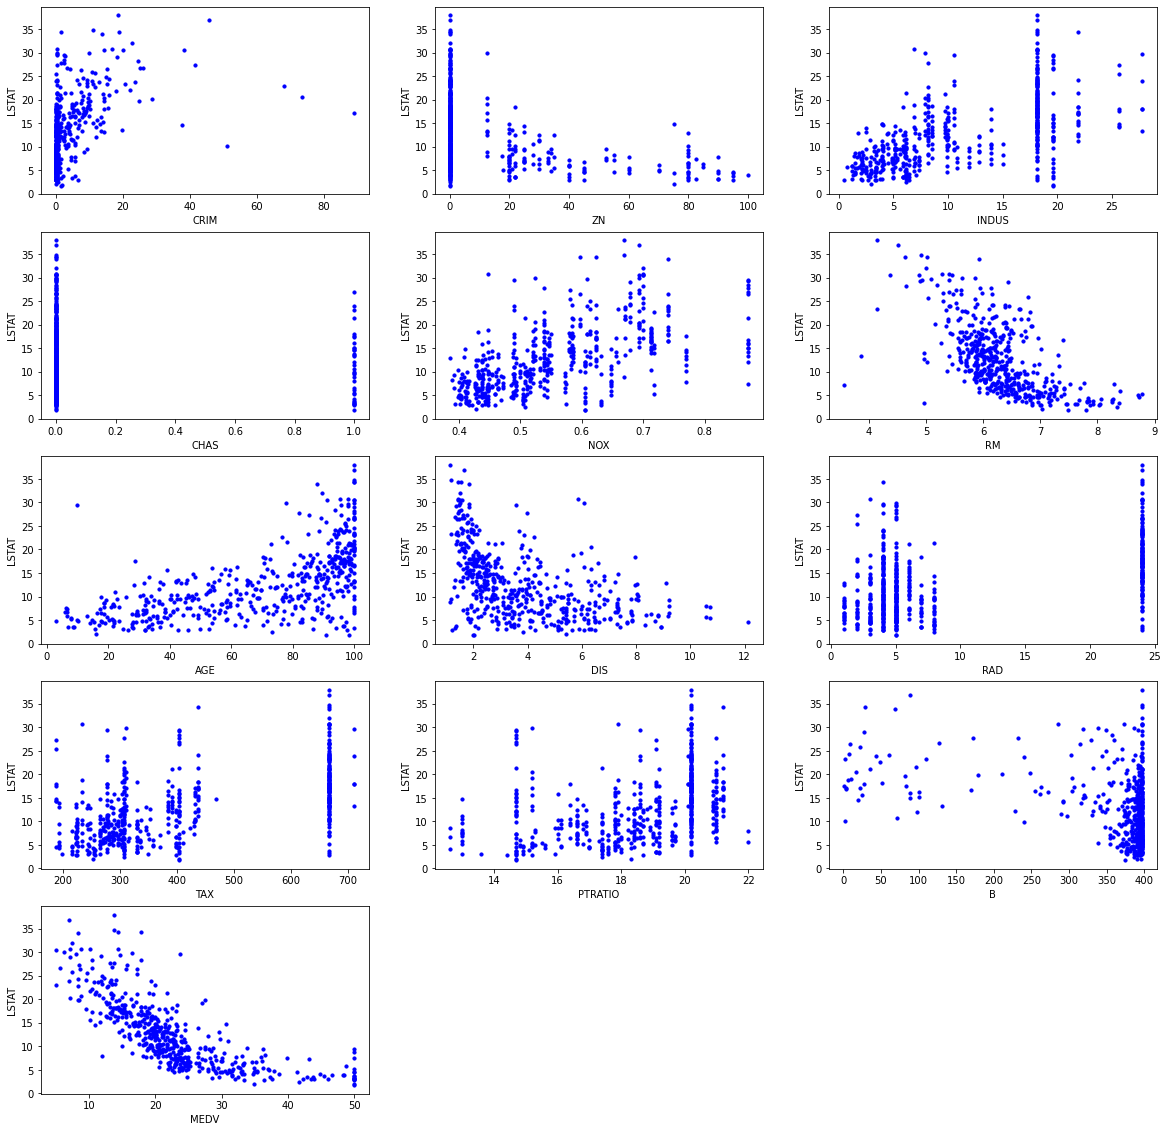

In [144]:
plt.figure(figsize = (20,20))
x_axis_list = [i for i in boston_dataframe.columns if i != 'LSTAT']
y_axis = boston_dataframe['LSTAT']


for i,col in enumerate(x_axis_list):
    import math
    row = math.ceil(len(x_axis_list)/3)
    plt.subplot(row,3,i+1)
    x_axis = boston_dataframe[col]
    plt.scatter(x_axis,y_axis,color='b',s=10)
    plt.xlabel(col)
    plt.ylabel('LSTAT')
    
    

# LINEAR REGRESSION MODEL FIT

In [145]:
#PREPARE DATA FOR TRAINING MODEL
#CONCATENATE LSTAT AND RM COLUMNS
X = pd.DataFrame(np.c_[boston_dataframe['LSTAT'],boston_dataframe['RM']], columns = ['LSTAT','RM'])
Y = boston_dataframe['MEDV']
print(X)
print(Y)

     LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4     5.33  7.147
..     ...    ...
501   9.67  6.593
502   9.08  6.120
503   5.64  6.976
504   6.48  6.794
505   7.88  6.030

[506 rows x 2 columns]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [146]:
#SPLIT INTO TRAINING AND TESTING DATA SETS (80% and 20%)
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [147]:
#TRAIN AND TEST THE MODEL -> LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

#EVALUATE THE MODEL USING RMSE AND R2-score
#Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
#R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression (linear regression)

#training set evaluation
Y_train_predict = linear_model.predict(X_train)
RMSE_train = np.sqrt(mean_squared_error(Y_train,Y_train_predict))
R2_train = r2_score(Y_train,Y_train_predict)

#test set evaluation
Y_test_predict = linear_model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(Y_test,Y_test_predict))
R2_test = r2_score(Y_test,Y_test_predict)

#results
print("Training set performance")
print('RMSE:',RMSE_train)
print('R2:',R2_train)

print('Test set performance')
print('RMSE:',RMSE_test)
print('R2:',R2_test)

Training set performance
RMSE: 5.2903630485515345
R2: 0.6363353379616082
Test set performance
RMSE: 6.434440411684905
R2: 0.6041142735229121
